In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('Altitude_vs_precipitation.csv', sep=';')
df.head()

,Station_id,Sum_of_precipitaiton,Altitude
0,216,322.7,298
1,389,335.8,436
2,390,378.5,610
3,613,395.1,206
4,644,387.6,150


In [61]:
df2 = df.sort_values(by=['Altitude'])
df2

,Station_id,Sum_of_precipitaiton,Altitude
24,5480,285.4,85
6,934,384.4,88
11,3031,370.9,92
17,4368,345.0,93
4,644,387.6,150
10,3028,379.7,157
29,7330,418.3,159
18,4400,373.1,171
31,13700,357.1,205
3,613,395.1,206


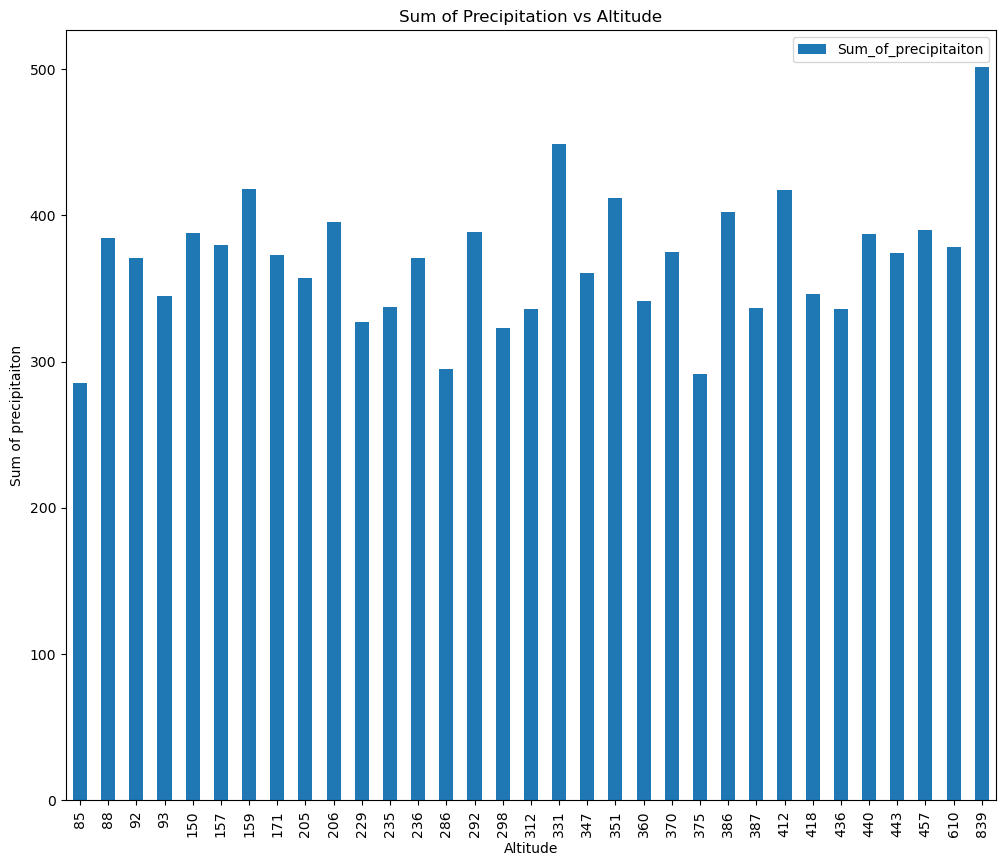

In [75]:
df3 = pd.DataFrame(df2, columns = ['Sum_of_precipitaiton','Altitude'])
ax = df3.plot.bar(x='Altitude', y='Sum_of_precipitaiton', figsize=(12,10))
plt.title("Sum of Precipitation vs Altitude")
plt.xlabel("Altitude")
plt.ylabel('Sum of precipitaiton')
plt.savefig('Sum_of_precipitaiton_vs_altitude.png')
plt.show()

In [76]:
df4 = pd.read_csv('Station_altitude_vs_DTM_altitude.csv', sep=';')
df4.head()

,altitude_from_station_meta_data,altitude_from_DTM_sampling,station_id,difference
0,839,838.5,2483,0.5
1,610,612.2,390,-2.2
2,457,457.3,6264,-0.3
3,443,441.8,4488,1.2
4,440,439.9,6313,0.1


In [77]:
df4.set_index("station_id",drop=True,inplace=True)
df4.head()

,altitude_from_station_meta_data,altitude_from_DTM_sampling,difference
station_id,,,
2483,839,838.5,0.5
390,610,612.2,-2.2
6264,457,457.3,-0.3
4488,443,441.8,1.2
6313,440,439.9,0.1


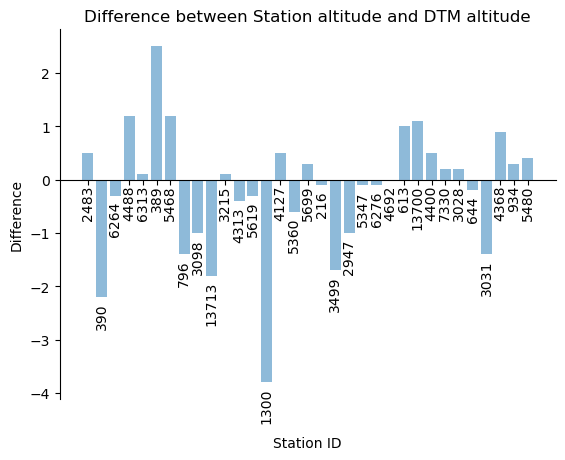

In [78]:
plt.rcdefaults()
objects = df4.index.values
y_pos = np.arange(len(objects))
performance = df4.difference
# print(objects)
plt.bar(y_pos, performance, align='center', alpha=0.5)

# Get the axes object
ax = plt.gca()
# remove the existing ticklabels
ax.set_xticklabels([])

# remove the extra tick on the negative bar
ax.set_xticks([idx for (idx, x) in enumerate(performance) if x > 0])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# placing each of the x-axis labels individually
label_offset = 0.1
for language, (x_position, y_position) in zip(objects, enumerate(performance)):
    if y_position > 0:
        label_y = -label_offset
    else:
        label_y = y_position - label_offset
    ax.text(x_position, label_y, language, ha="center", va="top", rotation=90)
# Placing the x-axis label, note the transformation into `Axes` co-ordinates
# previously data co-ordinates for the x ticklabels
ax.text(0.5, -0.1, "Station ID", ha="center", va="top", transform=ax.transAxes)

#df4.plot.bar(figsize=(12,8))
plt.title("Difference between Station altitude and DTM altitude")
plt.ylabel('Difference')
plt.savefig('altitude_difference_with_DTM_value.png')
plt.show()